# Import Libraries

In [ ]:
from pandas import read_csv
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier

# Load Dataset

In [ ]:
df = read_csv('Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# Perform EDA

In [ ]:
df.shape

(101, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [ ]:
# drop unimportant columns : animal name

df.drop('animal name', inplace=True, axis=1)

In [ ]:
list(df.columns)

['hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'type']

In [ ]:
df.shape

(101, 17)

## Perform Visualization

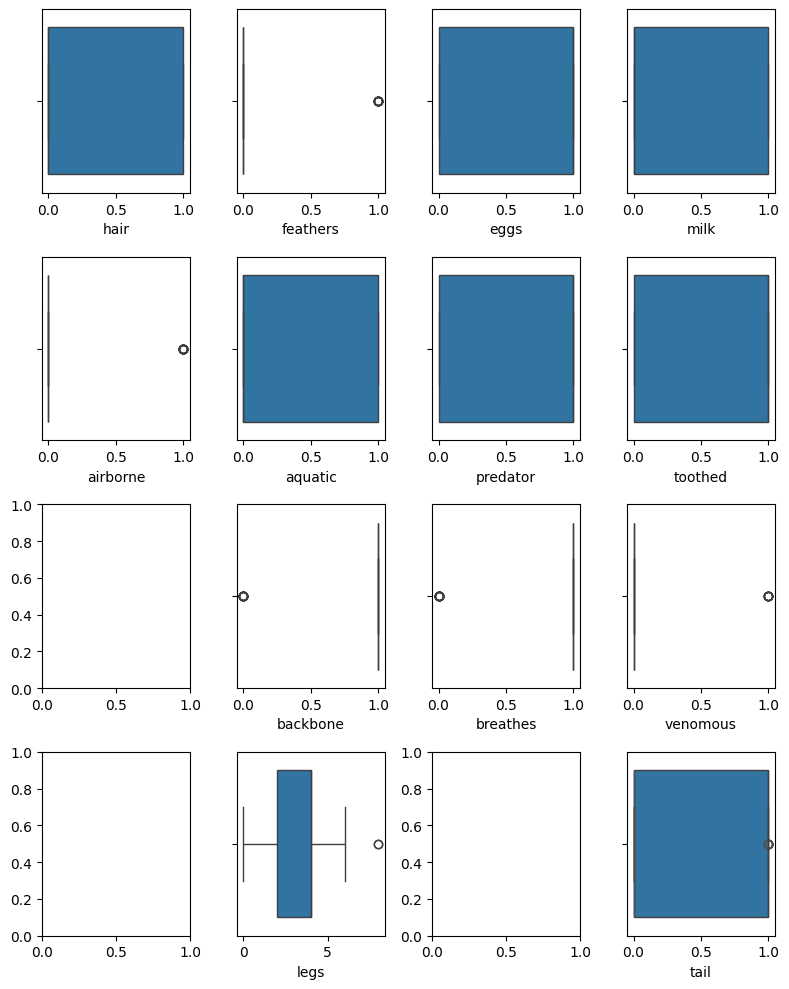

In [ ]:
# boxplot for given dataset using sns library subplots

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8, 10))
# sns.boxplot(data=df, orient="h", ax=axes[0,0]) # Plots all columns at once.
sns.boxplot(x=df['hair'], ax=axes[0, 0])
sns.boxplot(x=df['feathers'], ax=axes[0, 1])
sns.boxplot(x=df['eggs'], ax=axes[0, 2])
sns.boxplot(x=df['milk'], ax=axes[0, 3])
sns.boxplot(x=df['airborne'], ax=axes[1, 0])
sns.boxplot(x=df['aquatic'], ax=axes[1, 1])
sns.boxplot(x=df['predator'], ax=axes[1, 2])
sns.boxplot(x=df['toothed'], ax=axes[1, 3])
sns.boxplot(x=df['backbone'], ax=axes[2, 1])
sns.boxplot(x=df['breathes'], ax=axes[2, 2])
sns.boxplot(x=df['venomous'], ax=axes[2, 3])
sns.boxplot(x=df['legs'], ax=axes[3, 1])
sns.boxplot(x=df['tail'], ax=axes[3, 3])
sns.boxplot(x=df['domestic'], ax=axes[3, 3])



plt.tight_layout()
plt.show()

Above plots indicates all the columns in our dataset are categorical

# Detect Outliers

In [ ]:
# Detecting  outlier's in categorical data

from sklearn.ensemble import IsolationForest

# Create an IsolationForest model
model = IsolationForest(contamination='auto')

# Fit the model to the data
model.fit(df)

# Predict which data points are outliers
outliers = model.predict(df)

# Print the indices of the outliers
print(np.where(outliers == -1)[0])


[ 7  9 11 13 14 15 18 19 20 21 23 24 25 26 27 29 30 32 33 34 35 39 40 41
 42 46 51 52 53 56 57 58 60 62 63 66 71 72 73 74 75 76 77 78 79 80 81 82
 85 86 87 88 89 90 91 92 93 95 97 99]


# Split the Dataset into Train and Test

In [ ]:
array = df.values
x = array[:, 0:17]
y = array[:, 16]

In [ ]:
x

array([[1, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 0, 4],
       ...,
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 0, 7],
       [0, 1, 1, ..., 0, 0, 2]])

In [ ]:
y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2])

# Finding best K_neighbors value using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [ ]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid.fit(x,y)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.9901960784313726
{'n_neighbors': 1}


# Visualizing GridSearchCV results

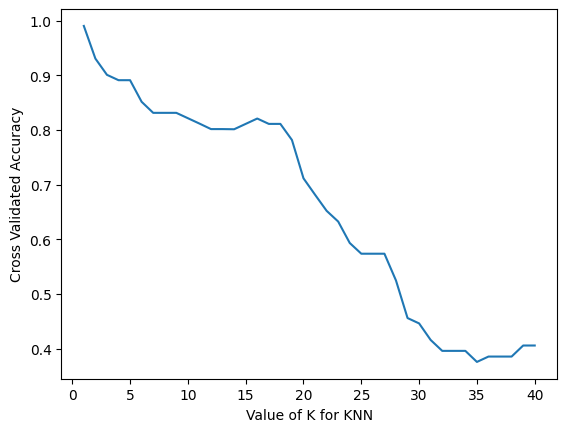

In [ ]:
# choose k between 1 to 41
k_range = range(1,41)
k_scores = []

# use iteration to calculate different k in models, then return average accuracy based on cross validation
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, x, y, cv=3)
  k_scores.append(scores.mean())

# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross Validated Accuracy')
plt.show()

# Model Building using KNN

In [ ]:
num_fold = 2
kfold = KFold(n_splits = 3)


**num_folds:**

- Refers to the number of subsets that the data is divided into during cross-validation.
- Each subset is used as a test set once, while the remaining subsets are used for training.
- Common values for num_folds are 3 (for a 3-fold cross-validation) or 10 (for a 10-fold cross-validation).

**num_splits:**

- Refers to the number of times the data is split into subsets during cross-validation.
- Each split results in a different set of training and test subsets.
- The results from all splits are then averaged to obtain a more robust estimate of the model's performance.
- num_splits is typically set to a larger value than num_folds (e.g., 10 splits for a 3-fold cross-validation).

**Difference:**

- num_folds specifies the number of subsets that the data is divided into, while num_splits specifies the number of times the data is split.
- num_splits is typically larger than or equal to num_folds.
- Using a larger number of splits can provide a more accurate estimate of the model's performance, but it also increases the computational cost of cross-validation.

In [ ]:
model = KNeighborsClassifier(n_neighbors=1)
results = cross_val_score(model, x, y, cv=kfold)

In [ ]:
results.mean()

0.9797979797979798

# KNN Model to Predict Accuracy on Test Data

In [87]:
# Evaluating the classifier's performance on the testing set using accuracy, precision

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Train the KNN classifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Calculate the accuracy and precision
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)


Accuracy: 1.0
Precision: 1.0



# Interview Questions:
1. What are the key hyperparameters in KNN?
* `n_neighbors`, `cv`, `num_splits`, and `num_folds` are all hyperparameters in the KNN model.

* `n_neighbors`: This hyperparameter determines the number of nearest neighbors to consider when making a prediction.
* `cv`: This hyperparameter specifies the number of folds to use in cross-validation.
* `num_splits`: This hyperparameter specifies the number of times to split the data into training and validation sets during cross-validation.
* `num_folds`: This hyperparameter specifies the number of subsets that the data is divided into during cross-validation.

* The optimal values for these hyperparameters can be found using techniques such as grid search or random search.
* By tuning these hyperparameters, the performance of the KNN model can be improved.

<br>

2. What distance metrics can be used in KNN?
* The KNN algorithm can use various distance metrics to measure the similarity between data points.
- Some commonly used distance metrics include:
- Euclidean distance
- Manhattan distance
- Minkowski distance
- Chebyshev distance
- Cosine similarity
- Hamming distance
- Jaccard distance

